In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
from tensorflow.keras.models import load_model


In [14]:
train_path='G:\\machinlearning\\facial\\datasets\\Training'
test_path='G:\\machinlearning\\facial\\datasets\\Testing\\Testing'

In [15]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
)
test_datagen=ImageDataGenerator(rescale=1./255)


In [16]:
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    train_path,
    color_mode='grayscale',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'
)
train_generator.class_indices

Found 28273 images belonging to 1 classes.


{'Training': 0}

In [17]:

validation_generator = test_datagen.flow_from_directory(
    test_path,
    color_mode='grayscale',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'
)
validation_generator.class_indices

Found 7058 images belonging to 6 classes.


{'Angry': 0, 'Fear': 1, 'Happy': 2, 'Neutral': 3, 'Sad': 4, 'Suprise': 5}

In [18]:
image,labels=train_generator.next()
def plot_image(img_arr,labels):
  count=0
  for ima,l in zip(img_arr,labels):
    plt.imshow(ima)
    plt.title(ima.shape)
    plt.axis=False
    plt.show()
    count+=1
    if count==10:
      break



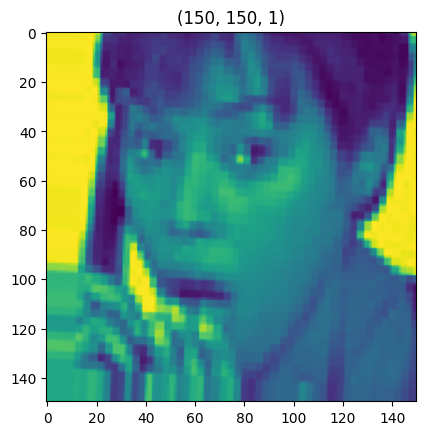

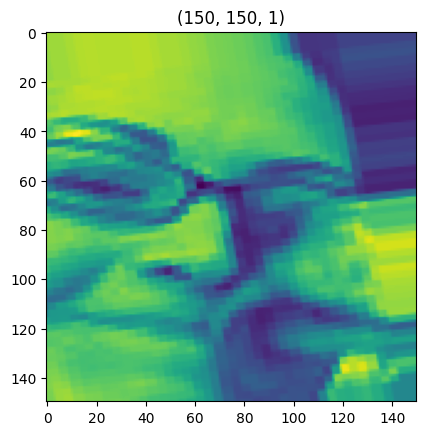

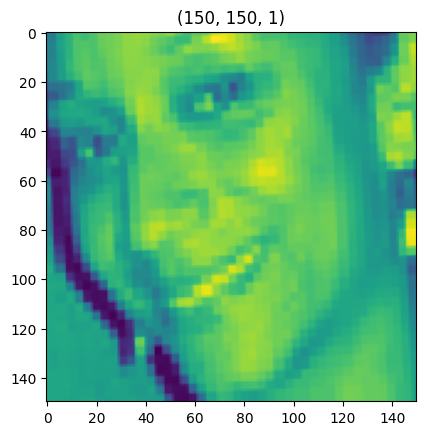

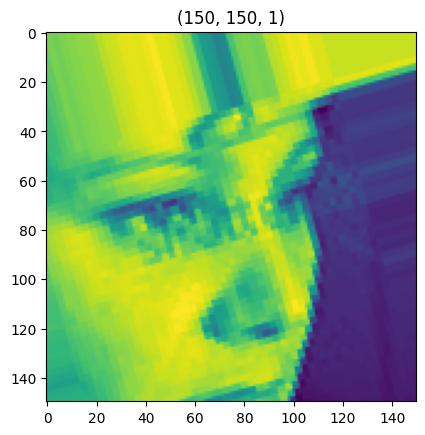

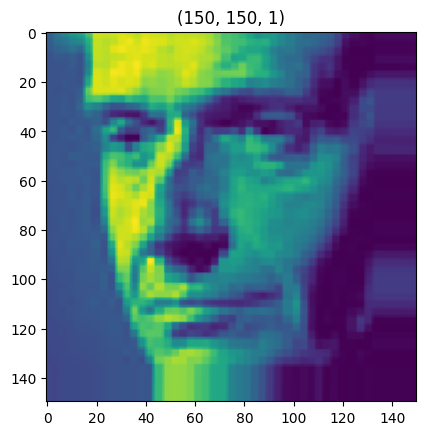

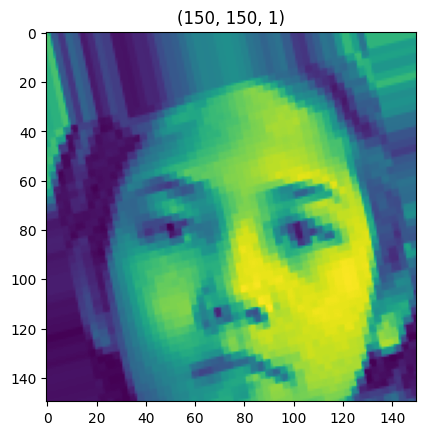

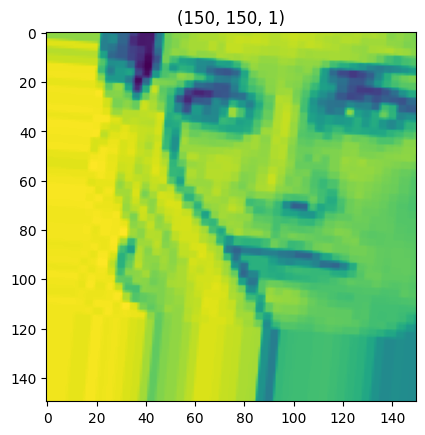

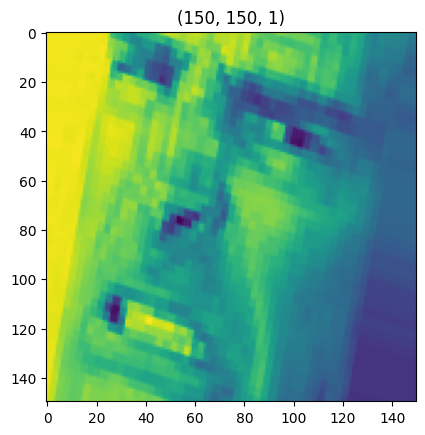

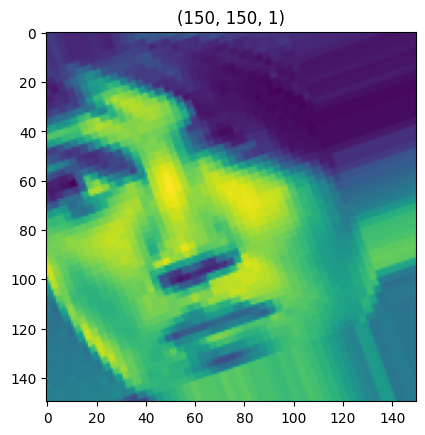

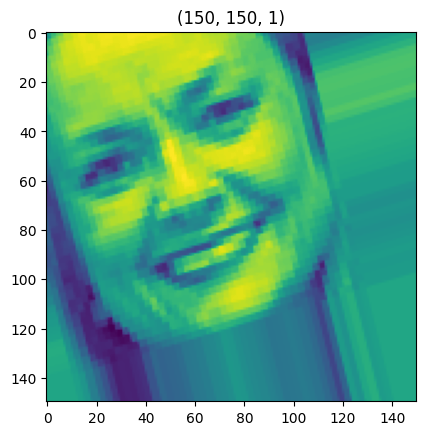

In [19]:
plot_image(image,labels)

In [20]:
# create CNN model
num_classes=6
model = Sequential()

model.add(Conv2D(16,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(150,150,1)))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes,activation='softmax'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      160       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 64)       

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
callback=EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=10,
    verbose=1,
    baseline=None,
    restore_best_weights=False
)

In [24]:
history = model.fit(train_generator,epochs=10,validation_data=validation_generator,callbacks=callback)

Epoch 1/10
884/884 [==============================] - 875s 988ms/step - loss: 8202611064832.0000 - accuracy: 0.0326 - val_loss: 7311083438080.0000 - val_accuracy: 0.1451
Epoch 2/10
884/884 [==============================] - 533s 603ms/step - loss: 419194579451904.0000 - accuracy: 0.0799 - val_loss: 145633717518336.0000 - val_accuracy: 0.1451
Epoch 3/10
884/884 [==============================] - 494s 559ms/step - loss: 3114721020477440.0000 - accuracy: 0.0939 - val_loss: 659227483832320.0000 - val_accuracy: 0.1177
Epoch 4/10
884/884 [==============================] - 601s 680ms/step - loss: 11020848500572160.0000 - accuracy: 0.0997 - val_loss: 1894189696548864.0000 - val_accuracy: 0.1451
Epoch 5/10
884/884 [==============================] - 394s 445ms/step - loss: 28070903371792384.0000 - accuracy: 0.1030 - val_loss: 3808300793593856.0000 - val_accuracy: 0.1177
Epoch 6/10
884/884 [==============================] - 285s 322ms/step - loss: 58700297286975488.0000 - accuracy: 0.1061 - val_l

In [ ]:
#saving the model
model.save('facial_expression.h5')

c:\Users\Dell\.conda\envs\machine\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


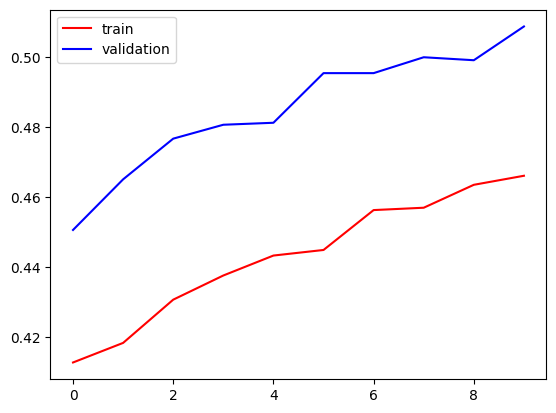

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

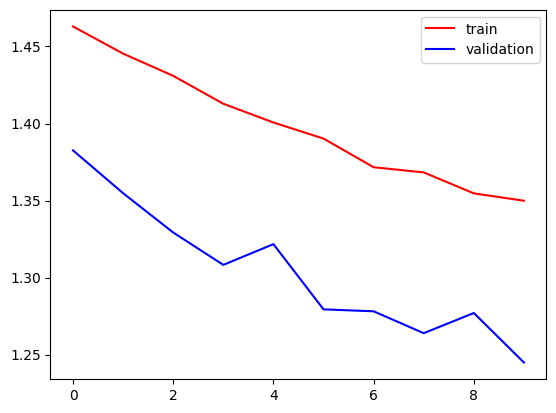

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(validation_generator)
y_pred

221/221 [==============================] - 14s 62ms/step


array([[0.09730307, 0.1699688 , 0.09420215, 0.2827009 , 0.32276455,
        0.03306052],
       [0.371829  , 0.09925447, 0.05201409, 0.22743969, 0.24136369,
        0.00809912],
       [0.3046827 , 0.09589642, 0.00784062, 0.2564638 , 0.3320167 ,
        0.00309972],
       ...,
       [0.2705348 , 0.1152209 , 0.03502683, 0.18068543, 0.39389682,
        0.00463513],
       [0.23762314, 0.1870981 , 0.09649546, 0.20110865, 0.18754415,
        0.09013046],
       [0.08859916, 0.33247766, 0.03550158, 0.02103443, 0.05023406,
        0.47215316]], dtype=float32)

In [ ]:
# Assuming you've already loaded the model and defined the function
model_path = 'facial_expression.h5'
model = load_model(model_path)

def predicted_img(img_path):
    test_img = cv2.imread(image_path)
    test_img = cv2.resize(test_img, (150, 150))
    test_input = test_img.reshape((1, 150, 150, 3))
    prediction = model.predict(test_input)

    plt.imshow(test_img)

    plt.show()

    # Find the class with the highest probability
    predicted_class = np.argmax(prediction)

    if predicted_class == 0:
        print('Angry')
    elif predicted_class == 1:
        print('Fear')
    elif predicted_class == 2:
        print('Happy')
    elif predicted_class == 3:
        print('Neutral')
    elif predicted_class == 4:
        print('Sad')
    elif predicted_class == 5:
        print('Surprise')



1/1 [==============================] - 0s 16ms/step


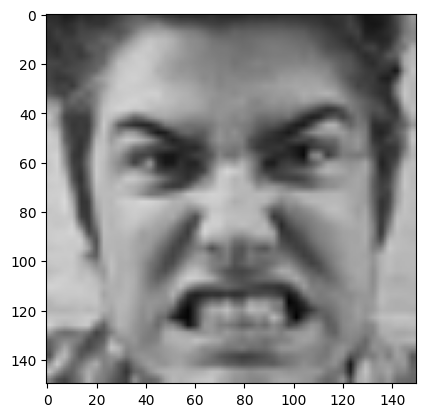

Angry


In [ ]:
image_path='G:\\myGit\\facial-expresion\\datasets\\Testing\\Testing\\Angry\\Angry-9.jpg'
predicted_img(image_path)